# Applying Machine Learning and Deep Learning to identify home appliances consuming excess power

## Copyright (c) 2018, Faststream Technologies
## Author: Sudhanva Narayana

In [1]:
# Home Appliances Data
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
# Import Dataset
df_home_data_test = pd.read_csv('../../../data/trial_1/home_data_predict_dt.csv')
df_home_priority = pd.read_csv('../../../data/trial_1/home_priority.csv')
date_time_group = pd.read_csv('../../../data/trial_1/date_time_group.csv')
final_output_group = pd.read_csv('../../../data/trial_1/final_output_group.csv')
final_output = pd.read_csv('../../../data/trial_1/final_output_dt.csv')

In [3]:
powers = np.array(date_time_group.groupby('date').sum()['power'])
dates = np.array(date_time_group.groupby('date').sum()['power'].index)
# dates = [datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%d-%m-%Y') for date in dates]
cumsum_powers = np.cumsum(powers)

In [4]:
final_powers = np.array(final_output_group.groupby('date').sum()['power'])
final_dates = np.array(final_output_group.groupby('date').sum()['power'].index)
# final_dates = [datetime.datetime.strptime(date, '%d-%m-%Y').strftime('%d-%m-%Y') for date in final_dates]
final_cumsum_powers = np.cumsum(final_powers)

In [5]:
total_power_consumption = date_time_group['power'].sum()
print("Total: ", total_power_consumption)

Total:  5654366


In [6]:
final_total_power_consumption = final_output_group['power'].sum()
print("Total: ", final_total_power_consumption)

Total:  5642079.703125


In [7]:
final_savings = np.array(final_output.groupby('date').mean()['savings'])

In [8]:
final_date_savings = final_powers - (final_savings * 20)
final_date_savings_real = np.sum(final_powers - final_savings *  20)
final_cumsum_date_savings = np.cumsum(final_date_savings)

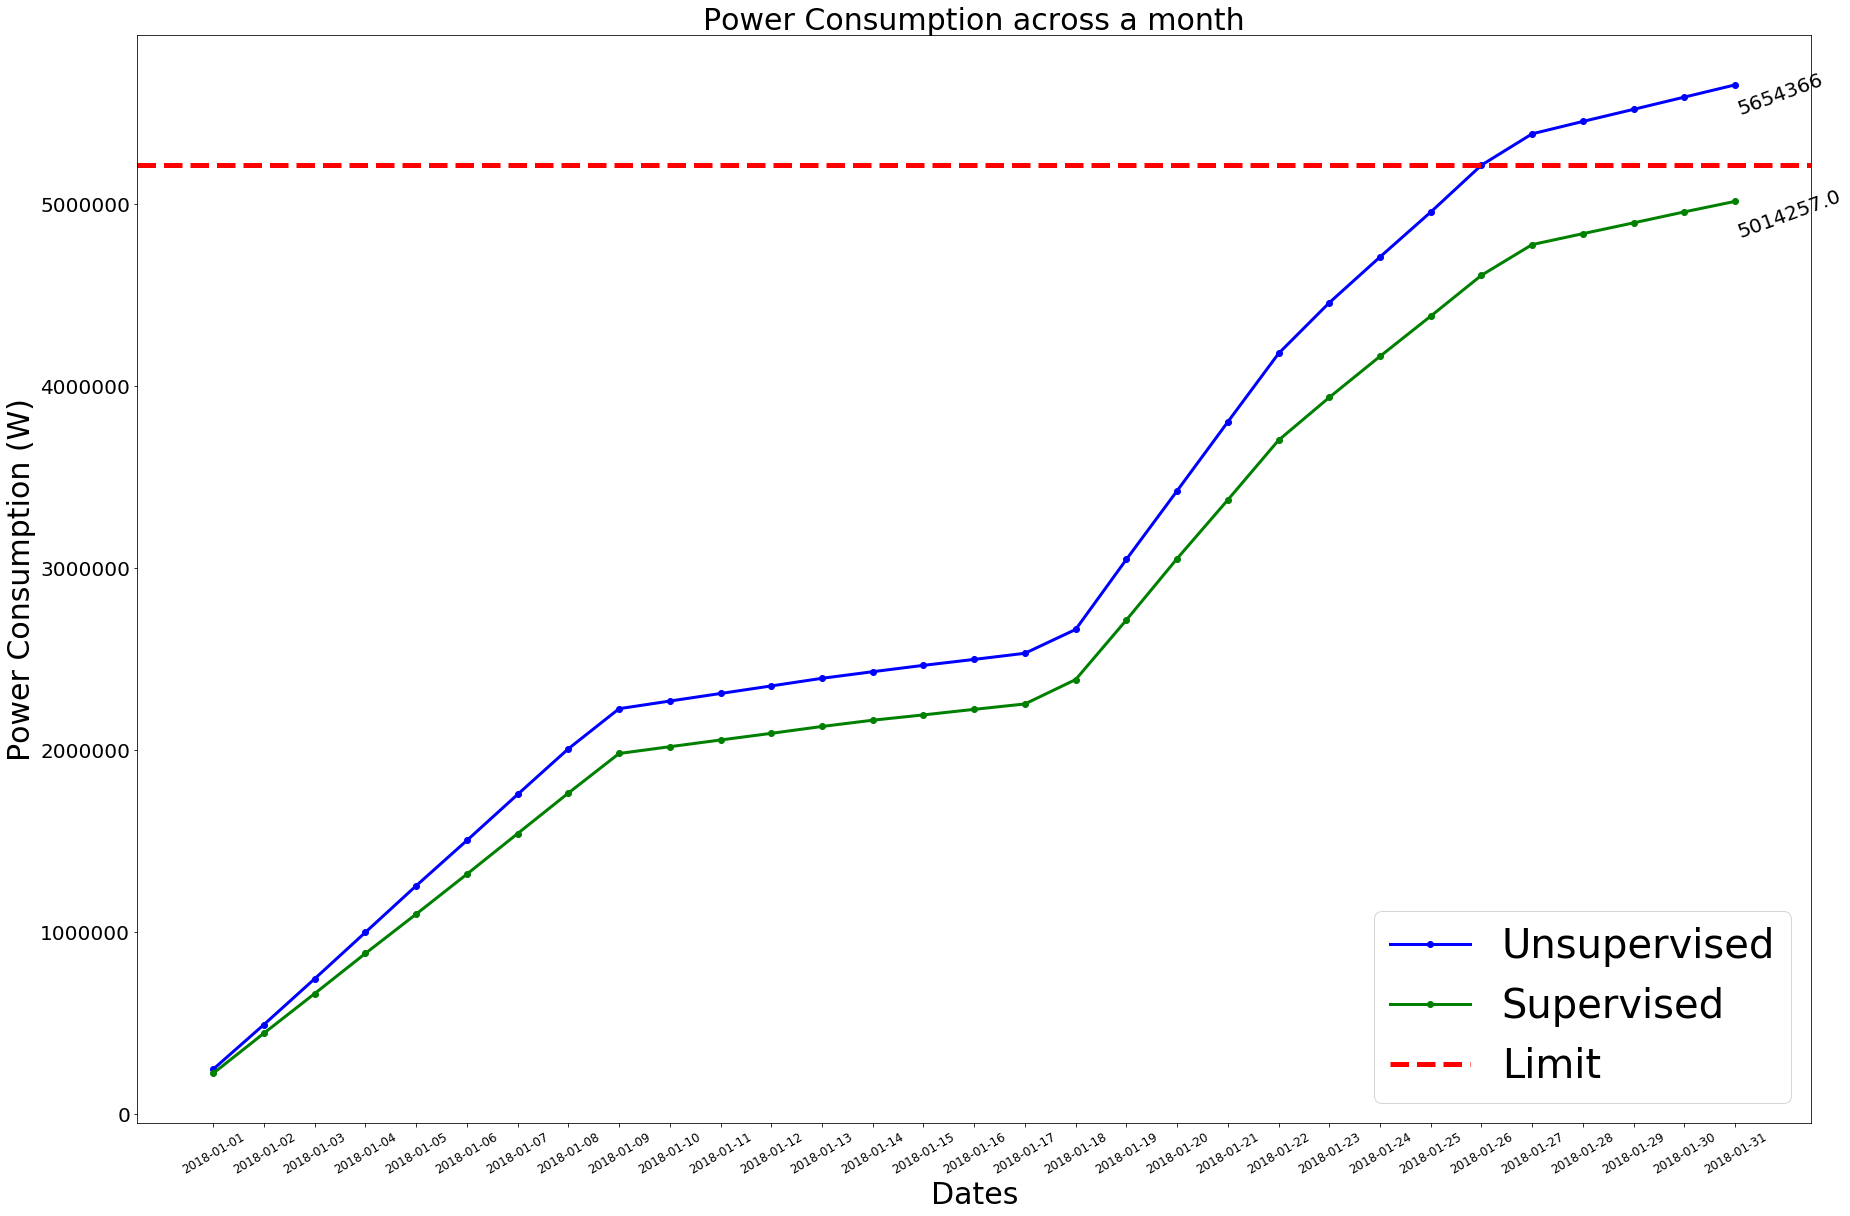

In [9]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
plt.xticks(np.arange(len(dates)), dates, rotation=30, fontsize=12)
plt.yticks(fontsize=20)
plt.title('Power Consumption across a month', fontsize=30)
plt.xlabel('Dates', fontsize=30)
plt.ylabel('Power Consumption (W)', fontsize=30)
plt.plot(dates, cumsum_powers, marker='o', color='b', label='Unsupervised', linewidth=3)
plt.plot(dates, final_cumsum_date_savings, marker='o', color='g', label='Supervised', linewidth=3)
plt.axhline(y=final_date_savings_real + 200000, color='r', linestyle='--', label='Limit', linewidth=5)

ax.annotate(str(total_power_consumption), xy=(dates[-1:], total_power_consumption), textcoords='data', fontsize=20, rotation=20)
ax.annotate(str(round(final_date_savings_real)), xy=(dates[-1:], final_date_savings_real), textcoords='data', fontsize=20, rotation=20)

plt.legend(loc='best', prop={'size': 40})
plt.show()